In [1]:
import matplotlib as plt
import sklearn as sklearn
import scipy as scipy
import pandas as pd
import numpy as np
import copy

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import pointnetfunct.functions as fun
from pointnetfunct.evaluation import show_cm_ml,draw_ROC_ml,print_values_advance


# Data Processing


In [3]:
import pointnetfunct.data_process_ml as data_process_ml
morpho_path = ".\AneuX\data-v1.0\data\morpho-per-cut.csv"
patient_path = ".\AneuX\data-v1.0\data\clinical.csv"
morpho_data_patient = data_process_ml.read_and_combine_data(morpho_path,patient_path)
merged_dataset = data_process_ml.encode_column(morpho_data_patient)
merged_dataset = data_process_ml.drop_columns(merged_dataset)
morpho_data_cut1,morpho_data_dome = data_process_ml.output_cut1anddome(merged_dataset)

d:\Universityofleeds\MSC_PROG\Msc_project\code\pointnetfunct\data_process_ml.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpho_data_cut1.drop(morpho_data_cut1.columns[3:23], axis=1, inplace=True)
d:\Universityofleeds\MSC_PROG\Msc_project\code\pointnetfunct\data_process_ml.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpho_data_cut1.drop(['source_x',"cuttype","dataset"], axis=1, inplace=True)
d:\Universityofleeds\MSC_PROG\Msc_project\code\pointnetfunct\data_process_ml.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

In [4]:
morpho_data_dome

,curvature-gauss--L2N,curvature.1-gauss-H,curvature.2-gauss-L2N,curvature.3-gauss-L2NCH,curvature.4-mean--L2N,curvature.5-mean-H,curvature.6-mean-L2N,curvature.7-mean-L2NCH,gi-shape-AR,gi.1-shape-BF,...,zmi_surf.135-energy-n15,zmi_surf.136-energy-n16,zmi_surf.137-energy-n17,zmi_surf.138-energy-n18,zmi_surf.139-energy-n19,zmi_surf.140-energy-n20,age,sex_female,sex_male,status_ruptured
2,0.725242,-0.0894094,2.60987,1.18701,0.198244,0.086614,1.86744,1.08866,0.876819,1.27173,...,28.1611,30.1846,32.0237,33.6042,35.1063,37.0662,64.2,1.0,0.0,0.0
6,0.524537,-0.360007,2.159,1.15799,0.0966873,-0.10215,1.69953,1.04997,0.991997,1.27592,...,27.2715,28.7998,31.0452,32.5206,34.0207,35.5299,72.7,1.0,0.0,0.0
10,1.96624,-1.21471,5.05633,1.32342,0.382815,-0.363665,2.30735,1.12822,1.07643,1.84807,...,30.9718,33.1091,35.1017,36.6565,38.4389,40.3165,50.9,0.0,1.0,0.0
14,7.7887,-0.823071,12.3872,2.40789,1.01931,-0.0544958,3.12703,1.35978,2.61395,3.16959,...,33.5714,35.2654,37.352,39.6833,41.1798,43.012,47.3,1.0,0.0,1.0
18,0.997234,0.089572,3.13267,1.2543,0.217909,0.224675,2.01593,1.0945,1.65683,1.53188,...,33.6385,36.6105,37.7905,38.8626,40.1787,42.9034,47.3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,0.721845,-0.296889,2.56924,1.28583,0.232378,-0.00342363,1.77134,1.08248,0.846195,1.21771,...,27.0863,28.7959,30.044,31.6594,33.5313,35.0494,43.0,1.0,0.0,0.0
2762,4.12822,-0.645817,6.74744,1.74333,0.647408,-0.0426904,2.48483,1.17665,1.22381,1.75334,...,30.977,32.9759,35.4072,37.0025,38.3394,40.0176,67.0,0.0,1.0,1.0
2766,2.58888,-0.0131127,3.83658,1.76325,0.585148,0.180077,2.00644,1.15457,1.62177,1.43968,...,31.0267,33.1905,35.183,37.068,38.5364,40.3243,84.0,1.0,0.0,1.0
2770,2.05335,-1.52289,5.4371,1.43257,0.520694,-0.527362,2.26569,1.13279,1.56048,1.5928,...,28.9163,30.6686,33.3345,34.573,35.9075,37.5832,59.0,1.0,0.0,1.0


In [5]:
filtered_rows = morpho_data_dome[morpho_data_dome['status_ruptured'] == 1]
filtered_rows.shape[0]

261

In [6]:
class DataFrameSelector(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

train_data_cat = copy.deepcopy(morpho_data_dome)
train_data_cat.drop(["status_ruptured"], axis=1, inplace=True)
data_num = list(train_data_cat)

num_pipeline= Pipeline([
    ('selector', DataFrameSelector(data_num)),
    ('imputer',SimpleImputer(strategy="mean")),
    ('stand_scalar',StandardScaler()),
])


full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline)
])

data_prepared = full_pipeline.fit_transform(train_data_cat)

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
target_data_copy = morpho_data_dome["status_ruptured"].copy()

data_copy = morpho_data_dome.copy()
data_test = morpho_data_dome.copy()
data_copy = data_copy[:635]
data_test = data_test[635:]
print(len(data_copy),len(data_test))

train_set, test_set = train_test_split(data_copy , test_size= 0.15, random_state=42)

train_set_target = train_set["status_ruptured"].copy()
train_set.drop(("status_ruptured"),axis=1,inplace=True)

test_set_target = test_set["status_ruptured"].copy()
test_set.drop(("status_ruptured"),axis=1,inplace=True)

data_test_target = data_test["status_ruptured"].copy()
data_test.drop(("status_ruptured"),axis=1,inplace=True)

test_prepared = full_pipeline.fit_transform(test_set)
train_prepared = full_pipeline.fit_transform(train_set)
data_test_prepared = full_pipeline.fit_transform(data_test)


635 100


In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def prediction_conv (list_pred, value = 0.5):
    list_result = []
    for i in list_pred:
        if i >= value:
            list_result.append(1)
        else:
            list_result.append(0)
    return list_result

def show_cm_ml(data_predictions, test_set_target):
    #cm = confusion_matrix(list(test_set_target), data_predictions)
    cm = fun.dim4_cm(list(test_set_target), data_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred Unrupture","Pred uncertain Unrupture","Pred uncertain Rupture","Pred Rupture"], yticklabels=["Real Unrupture"," Real Rupture"])

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
from pointnetfunct.evaluation import print_values

import matplotlib.pyplot as plt
def draw_ROC (y_true_binary, y_pred_binary,name):
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_binary)
    auc = roc_auc_score(y_true_binary, y_pred_binary)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + name )
    plt.legend(loc="lower right")
    plt.show()


    

# OLS

OLS internal test set Accuracy: 0.6770833333333334
OLS internal test set F1 score unrupture: 0.7596899224806201
OLS internal test set F1 score rupture: 0.507936507936508
OLS internal test set RMSE: 0.568257570707744
OLS internal test set Rupture Recall: 0.5333333333333333
OLS internal test set Rupture Precision: 0.48484848484848486
OLS internal test set UnRupture Recall: 0.7424242424242424
OLS internal test set UnRupture Precision: 0.7777777777777778


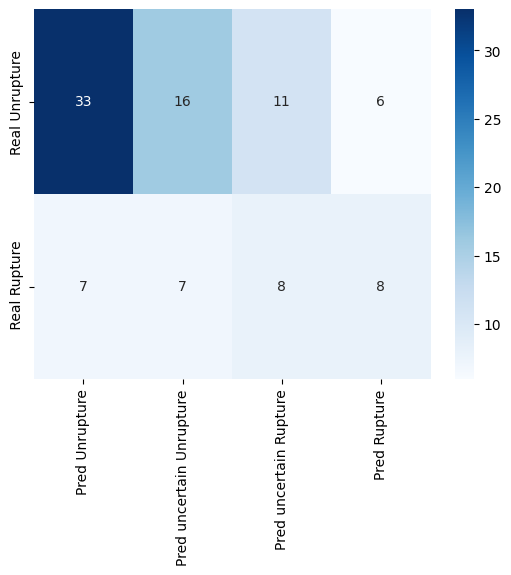

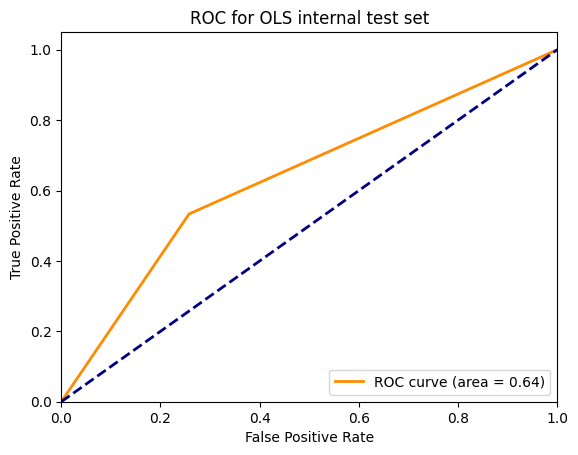

In [10]:

lin_reg=linear_model.LinearRegression()
lin_reg.fit(train_prepared,train_set_target)

data_predictions_raw = lin_reg.predict(test_prepared)
data_predictions = prediction_conv(data_predictions_raw,value=0.5)
data_mse=mean_squared_error(data_predictions, list(test_set_target))
print_values_advance( list(test_set_target), data_predictions,name="OLS internal test set")

show_cm_ml(data_predictions_raw, test_set_target)
draw_ROC(list(test_set_target), data_predictions,name = "OLS internal test set")


OLS external test set Accuracy: 0.54
OLS external test set F1 score unrupture: 0.634920634920635
OLS external test set F1 score rupture: 0.3783783783783784
OLS external test set RMSE: 0.6782329983125268
OLS external test set Rupture Recall: 0.3181818181818182
OLS external test set Rupture Precision: 0.4666666666666667
OLS external test set UnRupture Recall: 0.7142857142857143
OLS external test set UnRupture Precision: 0.5714285714285714


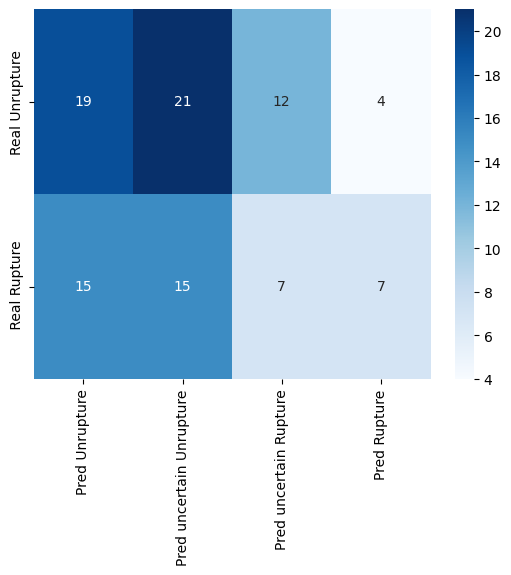

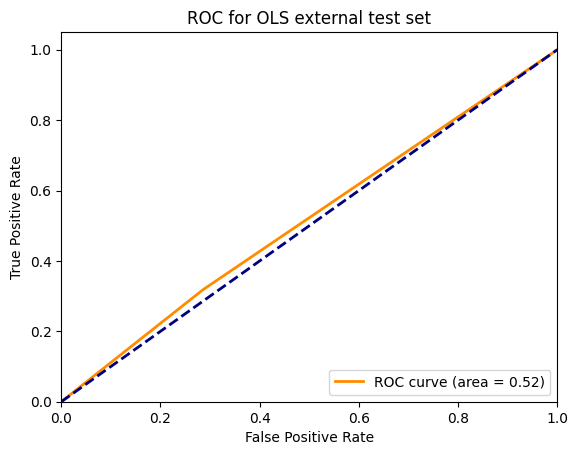

In [11]:
data_predictions_raw = lin_reg.predict(data_test_prepared)
data_predictions = prediction_conv(data_predictions_raw,value=0.5)
data_mse=mean_squared_error(data_predictions, list(data_test_target))
print_values_advance( list(data_test_target), data_predictions,name="OLS external test set")

show_cm_ml(data_predictions_raw, data_test_target)
draw_ROC(list(data_test_target), data_predictions,name = "OLS external test set")

# Lasso and Ridge linear Regression

Lasso best alpha: 0.02
Lasso internal test set Accuracy: 0.7708333333333334
Lasso internal test set F1 score unrupture: 0.8428571428571429
Lasso internal test set F1 score rupture: 0.576923076923077
Lasso internal test set RMSE: 0.47871355387816905
Lasso internal test set Rupture Recall: 0.5
Lasso internal test set Rupture Precision: 0.6818181818181818
Lasso internal test set UnRupture Recall: 0.8939393939393939
Lasso internal test set UnRupture Precision: 0.7972972972972973


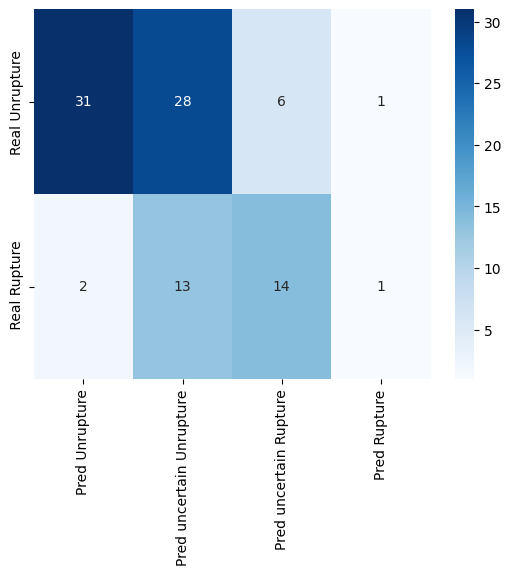

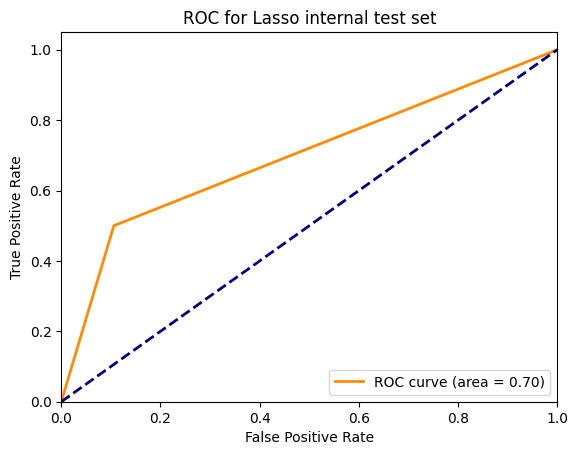

In [12]:
from sklearn.model_selection import GridSearchCV

#print(train_set_target)
model_cv = linear_model.LassoCV(alphas=list(np.arange(0.01,20,0.01)), cv=5).fit(train_prepared,train_set_target)
print("Lasso best alpha:",model_cv.alpha_)
las_reg_a = model_cv.alpha_
#las_reg_a = search.best_params_['model__alpha']
las_reg_a = model_cv.alpha_

lasso_reg = linear_model.Lasso(alpha=las_reg_a)
lasso_reg.fit(train_prepared,train_set_target)

data_predictions_raw = lasso_reg.predict(test_prepared)
data_predictions = prediction_conv(data_predictions_raw,value=0.5)

print_values_advance( list(test_set_target), data_predictions,name="Lasso internal test set")
show_cm_ml(data_predictions_raw, test_set_target)
draw_ROC(list(test_set_target), data_predictions,name = "Lasso internal test set")



Lasso external test set Accuracy: 0.61
Lasso external test set F1 score unrupture: 0.706766917293233
Lasso external test set F1 score rupture: 0.41791044776119407
Lasso external test set RMSE: 0.6244997998398398
Lasso external test set Rupture Recall: 0.3181818181818182
Lasso external test set Rupture Precision: 0.6086956521739131
Lasso external test set UnRupture Recall: 0.8392857142857143
Lasso external test set UnRupture Precision: 0.6103896103896104


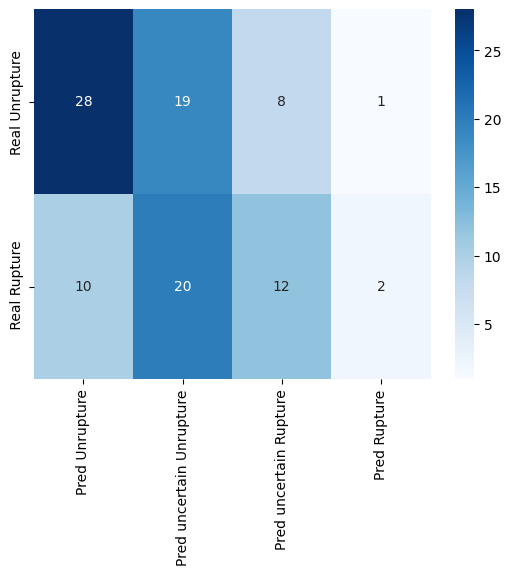

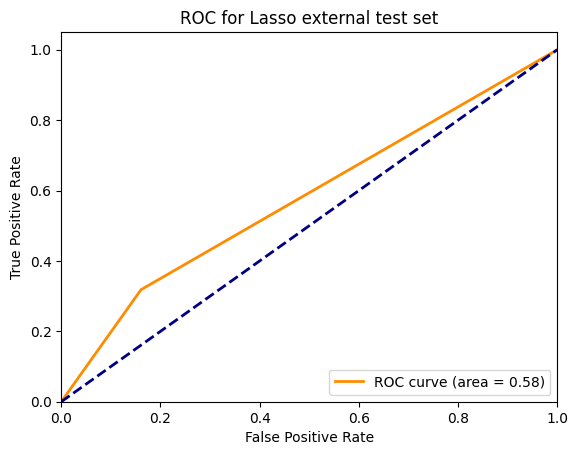

In [13]:
data_predictions_raw = lasso_reg.predict(data_test_prepared)
data_predictions = prediction_conv(data_predictions_raw,value=0.5)
data_mse=mean_squared_error(data_predictions, list(data_test_target))
print_values_advance( list(data_test_target), data_predictions,name="Lasso external test set")

show_cm_ml(data_predictions_raw, data_test_target)
draw_ROC(list(data_test_target), data_predictions,name = "Lasso external test set")

Ridge best alpha: 99.9
Ridge internal test Accuracy: 0.71875
Ridge internal test F1 score unrupture: 0.8029197080291971
Ridge internal test F1 score rupture: 0.509090909090909
Ridge internal test RMSE: 0.5303300858899106
Ridge internal test Rupture Recall: 0.4666666666666667
Ridge internal test Rupture Precision: 0.56
Ridge internal test UnRupture Recall: 0.8333333333333334
Ridge internal test UnRupture Precision: 0.7746478873239436


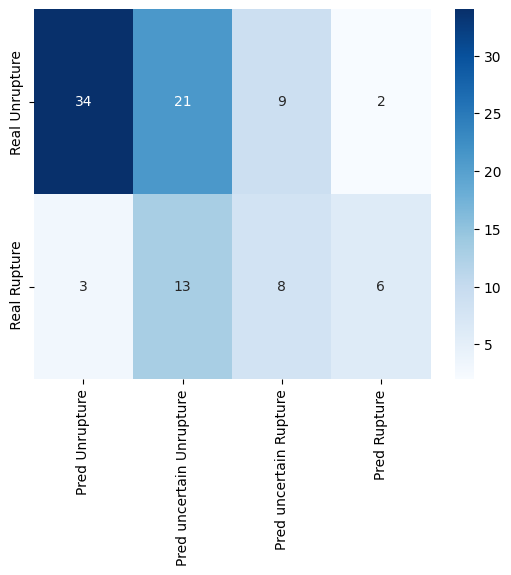

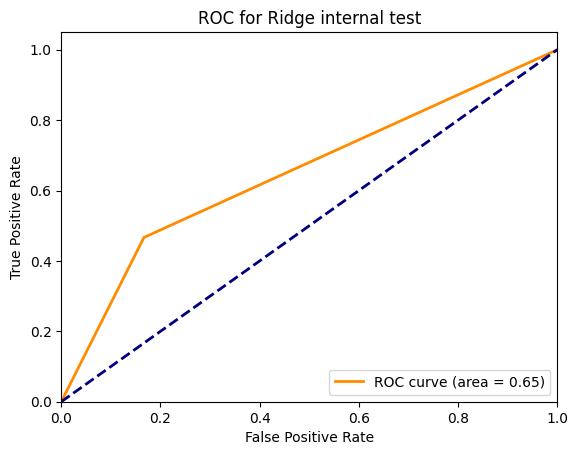

In [14]:
model_cv = linear_model.RidgeCV(alphas=list(np.arange(0.1,100,0.1)), cv=5).fit(train_prepared,train_set_target)
print("Ridge best alpha:",model_cv.alpha_)
ridge_reg_a = model_cv.alpha_
ridge_reg_a =model_cv.alpha_

ridge_reg = linear_model.Ridge(alpha=ridge_reg_a)
ridge_reg.fit(train_prepared,train_set_target)

data_predictions_raw = ridge_reg.predict(test_prepared)
data_predictions = prediction_conv(data_predictions_raw,value=0.5)

print_values_advance( list(test_set_target), data_predictions,name="Ridge internal test")
show_cm_ml(data_predictions_raw, test_set_target)
draw_ROC(list(test_set_target), data_predictions,name = "Ridge internal test")


Ridge external test Accuracy: 0.58
Ridge external test F1 score unrupture: 0.671875
Ridge external test F1 score rupture: 0.41666666666666663
Ridge external test RMSE: 0.648074069840786
Ridge external test Rupture Recall: 0.3409090909090909
Ridge external test Rupture Precision: 0.5357142857142857
Ridge external test UnRupture Recall: 0.7678571428571429
Ridge external test UnRupture Precision: 0.5972222222222222


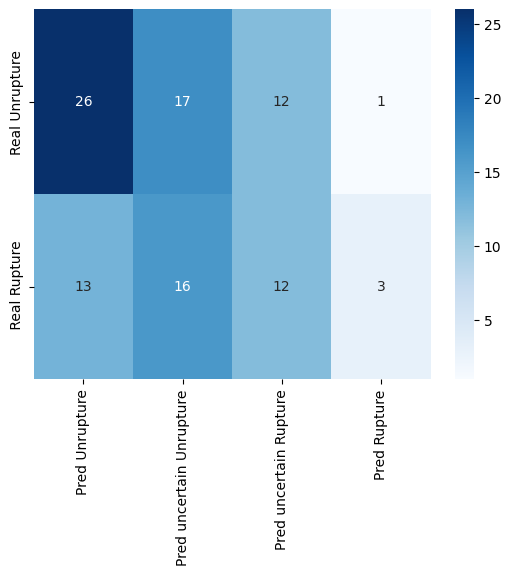

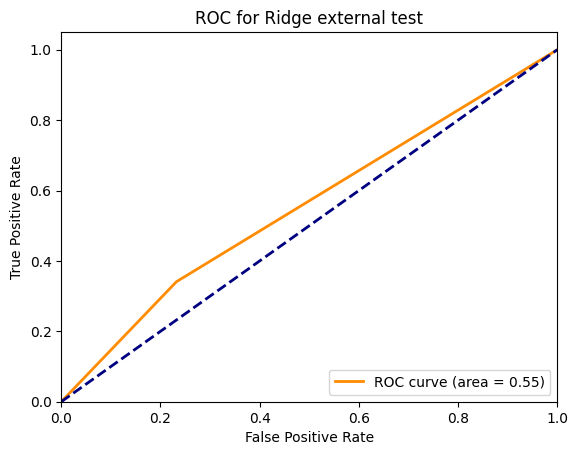

In [15]:
data_predictions_raw = ridge_reg.predict(data_test_prepared)
data_predictions = prediction_conv(data_predictions_raw,value=0.5)
data_mse=mean_squared_error(data_predictions, list(data_test_target))
print_values_advance( list(data_test_target), data_predictions,name="Ridge external test")

show_cm_ml(data_predictions_raw, data_test_target)
draw_ROC(list(data_test_target), data_predictions,name = "Ridge external test")

# Logistic Regression

Logistic internal test set Accuracy: 0.7604166666666666
Logistic internal test set F1 score unrupture: 0.8296296296296296
Logistic internal test set F1 score rupture: 0.5964912280701755
Logistic internal test set RMSE: 0.48947250518628044
Logistic internal test set Rupture Recall: 0.5666666666666667
Logistic internal test set Rupture Precision: 0.6296296296296297
Logistic internal test set UnRupture Recall: 0.8484848484848485
Logistic internal test set UnRupture Precision: 0.8115942028985508


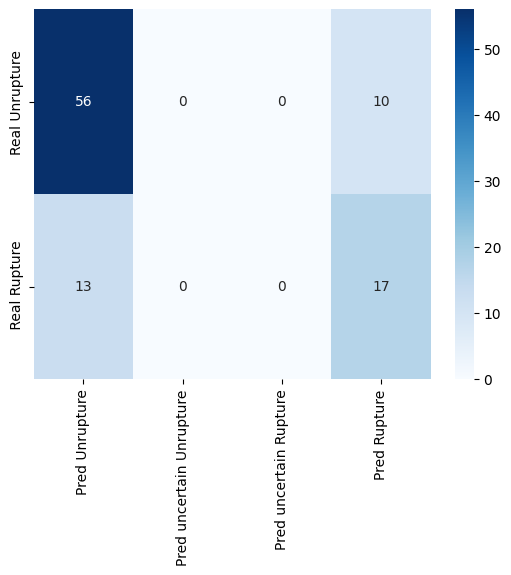

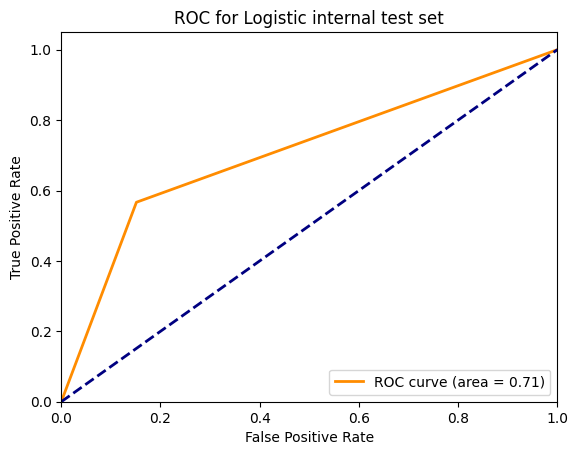

In [16]:
from sklearn.linear_model import LogisticRegression
#L1
logreg = LogisticRegression(penalty='l2', solver='liblinear')

logreg.fit(train_prepared,train_set_target)

data_predictions_raw = logreg.predict(test_prepared)
data_predictions = prediction_conv(data_predictions_raw)

print_values_advance( list(test_set_target), data_predictions,name="Logistic internal test set")
show_cm_ml(data_predictions_raw, test_set_target)
draw_ROC(list(test_set_target), data_predictions,name = "Logistic internal test set")

Logistic external test set Accuracy: 0.57
Logistic external test set F1 score unrupture: 0.6504065040650405
Logistic external test set F1 score rupture: 0.44155844155844154
Logistic external test set RMSE: 0.6557438524302001
Logistic external test set Rupture Recall: 0.38636363636363635
Logistic external test set Rupture Precision: 0.5151515151515151
Logistic external test set UnRupture Recall: 0.7142857142857143
Logistic external test set UnRupture Precision: 0.5970149253731343


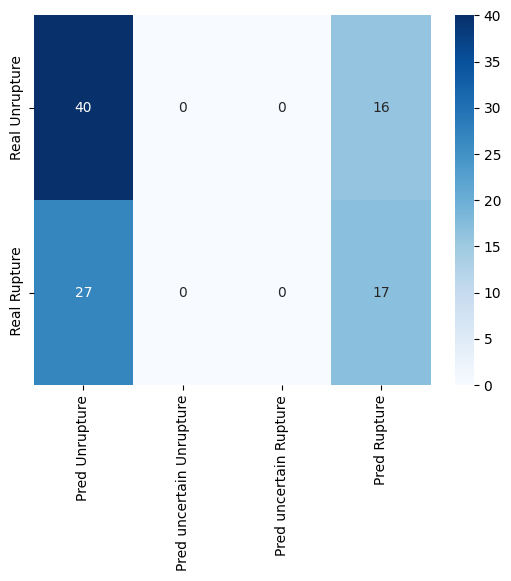

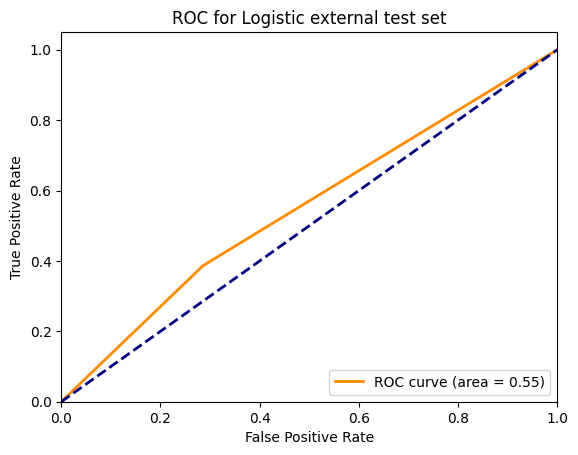

In [17]:
data_predictions_raw = logreg.predict(data_test_prepared)
data_predictions = prediction_conv(data_predictions_raw)

print_values_advance( list(data_test_target), data_predictions,name="Logistic external test set")
show_cm_ml(data_predictions_raw, data_test_target)
draw_ROC(list(data_test_target), data_predictions,name = "Logistic external test set")

# Random Tree

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Random Tree Regressor internal test Accuracy: 0.7395833333333334
Random Tree Regressor internal test F1 score unrupture: 0.8201438848920863
Random Tree Regressor internal test F1 score rupture: 0.5283018867924527
Random Tree Regressor internal test RMSE: 0.5103103630798288
Random Tree Regressor internal test Rupture Recall: 0.4666666666666667
Random Tree Regressor internal test Rupture Precision: 0.6086956521739131
Random Tree Regressor internal test UnRupture Recall: 0.8636363636363636
Random Tree Regressor internal test UnRupture Precision: 0.7808219178082192


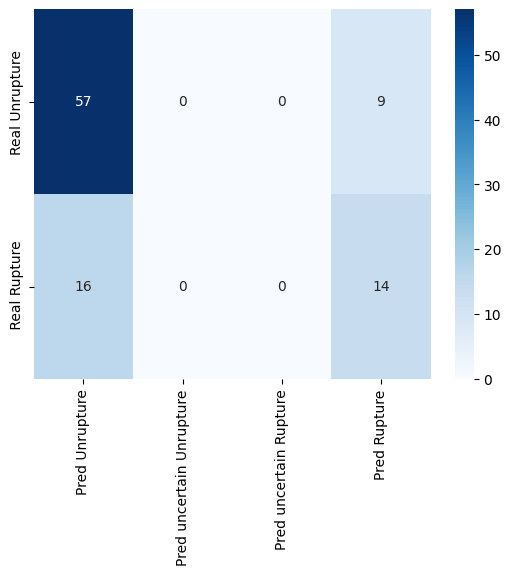

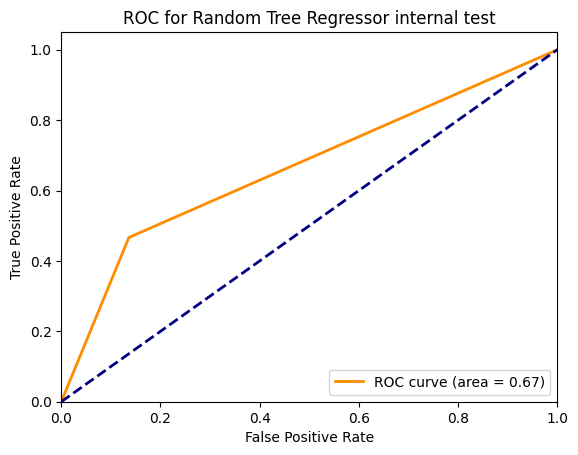

96


In [18]:

forest_reg=RandomForestRegressor()
#find estimator for random forest regression
param_grid  = [{'n_estimators': [470,430],'max_features':[1,23, 27]}, 
               {'bootstrap': [False],'n_estimators':[30],'max_features':[8]}]


grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error', verbose = 1)
grid_search.fit(train_prepared,train_set_target)

RT_prediction_raws = grid_search.predict(test_prepared)
data_predictions = prediction_conv(RT_prediction_raws,value=0.5)

print_values_advance( list(test_set_target), data_predictions,name="Random Tree Regressor internal test")
show_cm_ml(data_predictions, test_set_target)
draw_ROC(list(test_set_target), data_predictions,name = "Random Tree Regressor internal test")
print(len(data_predictions))

Random Tree Regressor external test Accuracy: 0.62
Random Tree Regressor external test F1 score unrupture: 0.7121212121212123
Random Tree Regressor external test F1 score rupture: 0.4411764705882353
Random Tree Regressor external test RMSE: 0.6164414002968976
Random Tree Regressor external test Rupture Recall: 0.3409090909090909
Random Tree Regressor external test Rupture Precision: 0.625
Random Tree Regressor external test UnRupture Recall: 0.8392857142857143
Random Tree Regressor external test UnRupture Precision: 0.618421052631579


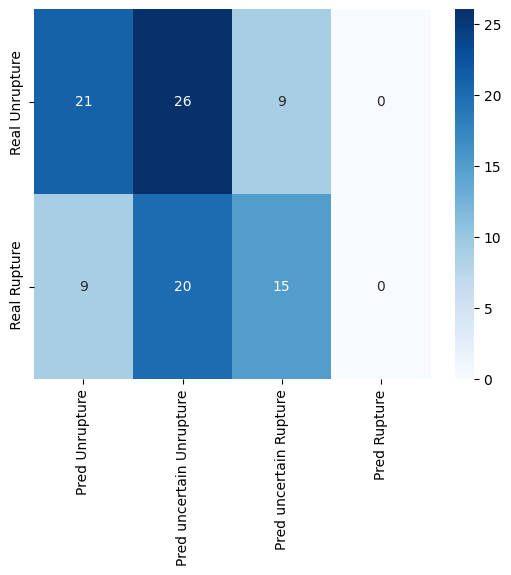

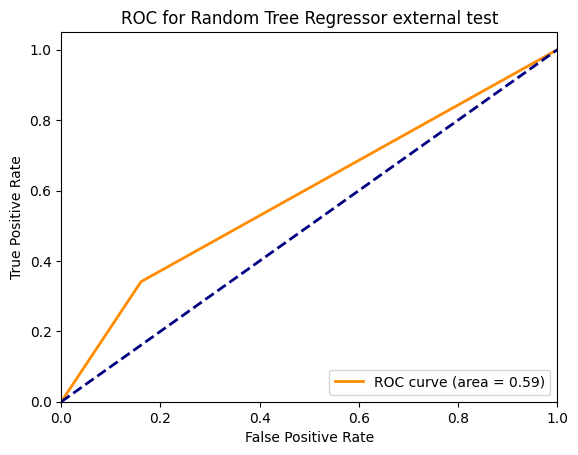

In [19]:
data_predictions_raw = grid_search.predict(data_test_prepared)
data_predictions = prediction_conv(data_predictions_raw)

print_values_advance( list(data_test_target), data_predictions,name="Random Tree Regressor external test")
show_cm_ml(data_predictions_raw, data_test_target)
draw_ROC(list(data_test_target), data_predictions,name = "Random Tree Regressor external test")

# random forest

Random forest Classifier internal test Accuracy: 0.7395833333333334
Random forest Classifier internal test F1 score unrupture: 0.8148148148148148
Random forest Classifier internal test F1 score rupture: 0.5614035087719299
Random forest Classifier internal test RMSE: 0.5103103630798288
Random forest Classifier internal test Rupture Recall: 0.5333333333333333
Random forest Classifier internal test Rupture Precision: 0.5925925925925926
Random forest Classifier internal test UnRupture Recall: 0.8333333333333334
Random forest Classifier internal test UnRupture Precision: 0.7971014492753623


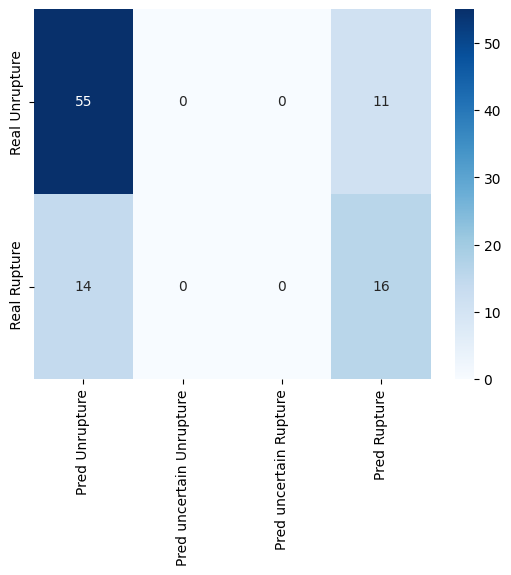

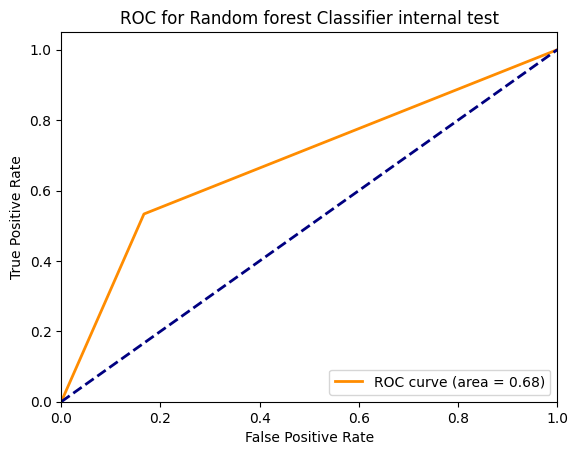

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_reg= RandomForestClassifier(n_estimators=100, random_state=42)
forest_reg.fit(train_prepared,train_set_target)

RT_predictions_raw = forest_reg.predict(test_prepared)
data_predictions = prediction_conv(RT_predictions_raw,value=0.5)

print_values_advance( list(test_set_target), data_predictions,name="Random forest Classifier internal test")
show_cm_ml(data_predictions, test_set_target)
draw_ROC(list(test_set_target), data_predictions,name = "Random forest Classifier internal test")

Random forest Classifier external test Accuracy: 0.62
Random forest Classifier external test F1 score unrupture: 0.7164179104477612
Random forest Classifier external test F1 score rupture: 0.4242424242424242
Random forest Classifier external test RMSE: 0.6164414002968976
Random forest Classifier external test Rupture Recall: 0.3181818181818182
Random forest Classifier external test Rupture Precision: 0.6363636363636364
Random forest Classifier external test UnRupture Recall: 0.8571428571428571
Random forest Classifier external test UnRupture Precision: 0.6153846153846154


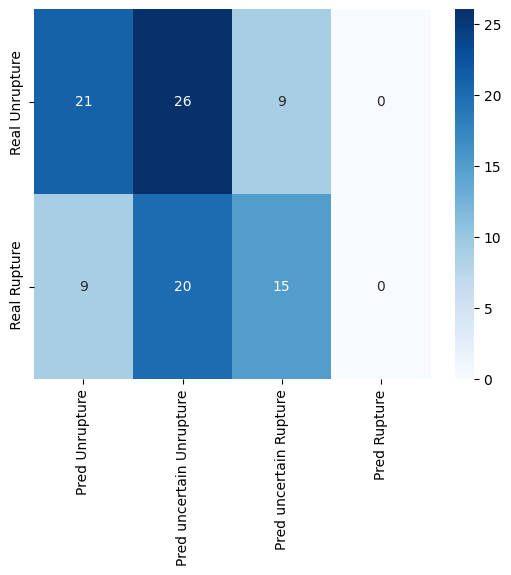

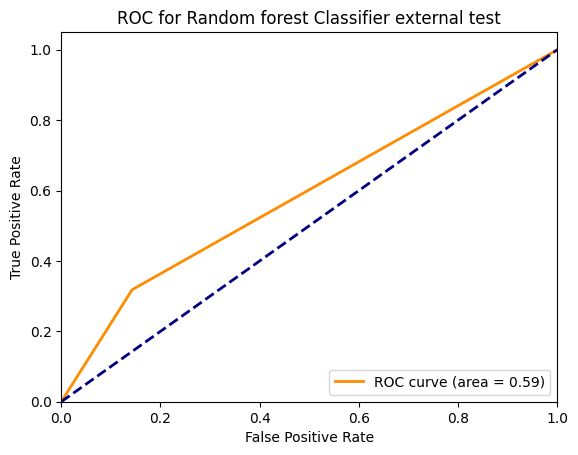

In [21]:
RT_predictions_raw = forest_reg.predict(data_test_prepared)
data_predictions = prediction_conv(RT_predictions_raw,value=0.5)

print_values_advance( list(data_test_target), data_predictions,name="Random forest Classifier external test")
show_cm_ml(data_predictions_raw, data_test_target)
draw_ROC(list(data_test_target), data_predictions,name = "Random forest Classifier external test")